In [2]:
%load_ext autoreload
%autoreload 2
from easing import easing
import numpy as np
import pandas as pd

# Tabel of contents
* [Falling box](#falling_box)
* [Ocean sine waves](#ocean_sine_waves)

In [3]:
eased_list = []
anim_type = []
feats_kws = []

#### Falling box  <a class="anchor" id="falling_box"></a>

In [4]:
# Coordinates for keyframes 1 and 2
keyframe1_df = pd.DataFrame({
    "x": [1.0, 1.0, 2.0, 2.0],
    "y": [2.0, 3.0, 3.0, 2.0]})

keyframe2_df = pd.DataFrame({
    "x": [1.0, 1.0, 2.0, 2.0],
    "y": [-0.5, 0.5, 0.5, -0.5]})

# Flatten and stack the keyframes
kf1_flattened = keyframe1_df[["x", "y"]].to_numpy().reshape(1,-1)
kf2_flattened = keyframe2_df[["x", "y"]].to_numpy().reshape(1,-1)
data_df = pd.DataFrame(np.vstack([kf1_flattened, kf2_flattened]))

# Create easing object
eased_polygon = easing.Eased(data_df, wrap=False)

# Apply overshoot easing
eased_polygon.overshoot_ease(freq=0.1, fpt=40, fstall=True)

# Append to lists
feats_kws.append({"fc": "#ff7f0e", 'alpha':1})
eased_list.append(eased_polygon)
anim_type.append("polygon")

#### Ocean sine waves <a class="anchor" id="ocean_sine_waves"></a>

In [5]:
# Color palette for the sine waves
ocean_palette = ['#2f6b96', '#308db2', '#2db1ce']

# X-axis range for all sine waves
x_array = np.linspace(0, np.pi, 100)

# Create three sine waves at different heights in the plot
for j, wave_color in enumerate(ocean_palette):
    
    kfs = []
    
    # Create 5 keyframes for each sine wave
    for i in np.linspace(0, 1, 5):

        # Sine wave follows the following structure:
        # y = a + b*sin(c*x + d) + e
        # where:
        # a = 0.25 (base height)
        # b = 0.04 (amplitude)
        # c = 20 (frequency)
        # d = pi * i (phase shift)
        # e = -j * 0.2 (vertical shift)
        y_array = 0.25 + 0.04 * np.sin(x_array*20 + np.pi*i) + (-j*0.2)

        keyframe_df = pd.DataFrame({
            "x": x_array,
            "y": y_array
        })
        
        # Add two coordinates to close the polygon
        keyframe_df.loc[len(keyframe_df)] =  {'x':np.pi, 'y':-1}
        keyframe_df.loc[len(keyframe_df)] =  {'x':0, 'y':-1}

        # Flatten and stack the keyframes
        kf_flattened = keyframe_df[["x", "y"]].to_numpy().reshape(1,-1)
        kfs.append(kf_flattened)


    data_df = pd.DataFrame(np.vstack(kfs))
    
    # Create easing object
    eased_wave = easing.Eased(data_df, wrap=False)
    
    # Apply power easing (n=1, linear transition between keyframes)
    eased_wave.power_ease(n=1, fpt=20)
    
    # Append to lists
    feats_kws.append({"fc": wave_color, 'alpha': 0.3})
    eased_list.append(eased_wave)
    anim_type.append("polygon")

In [6]:
# Move box instance to the third plotting position
eased_list = [eased_list[1], eased_list[0]] + eased_list[2:]
anim_type = [anim_type[1], anim_type[0]] + anim_type[2:]
feats_kws = [feats_kws[1], feats_kws[0]] + feats_kws[2:]

MovieWriter imagemagick unavailable; using Pillow instead.


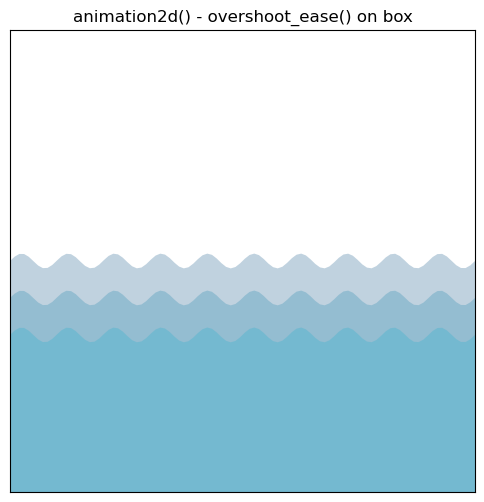

In [7]:
# Create animation
easing.animation2d(eased_list, anim_type, duration=1.0, 
                   feats_kws=feats_kws,
                   ax_kws={'xlim':(0, np.pi), 'ylim':(-1, 1.5), 
                           'xticks':[], 'yticks':[], 
                           'title':'animation2d() - overshoot_ease() on box'}, 
                   destination='media/falling_box.gif',
                   )